In [35]:
library(statcanR)
library(tidyverse)
library(dbplyr)

- All the data sources in this project come from [Statcan](https://www150.statcan.gc.ca/n1/en/type/data)

### 1.
- Get data for **quarterly Canadian GDP 1961-2022**. 
- Plot the **seasonally adjusted** data both for **real** and **nominal** values in two different figures. 
- Try to identify any historical episode in the series and illustrate which one is more informative

Source from: Statistics Canada. Table 36-10-0104-01  Gross domestic product, expenditure-based, Canada, quarterly (x 1,000,000). DOI: https://doi.org/10.25318/3610010401-eng

In [36]:
gdp_exp <- statcan_data("36-10-0104-01","eng")
colnames(gdp_exp) <- make.names(colnames(gdp_exp), unique = TRUE)
gdp_exp$Prices <- as.factor(gdp_exp$Prices)
gdp_exp$Estimates <- as.factor(gdp_exp$Estimates)
gdp_exp$Seasonal.adjustment <- as.factor(gdp_exp$Seasonal.adjustment)
#summary(gdp_exp)

statcanR: downloading remote table.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 68 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): Cube Title, Product Id, CANSIM Id, URL, Cube Notes, Archive Status...
date (1): End Reference Period

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


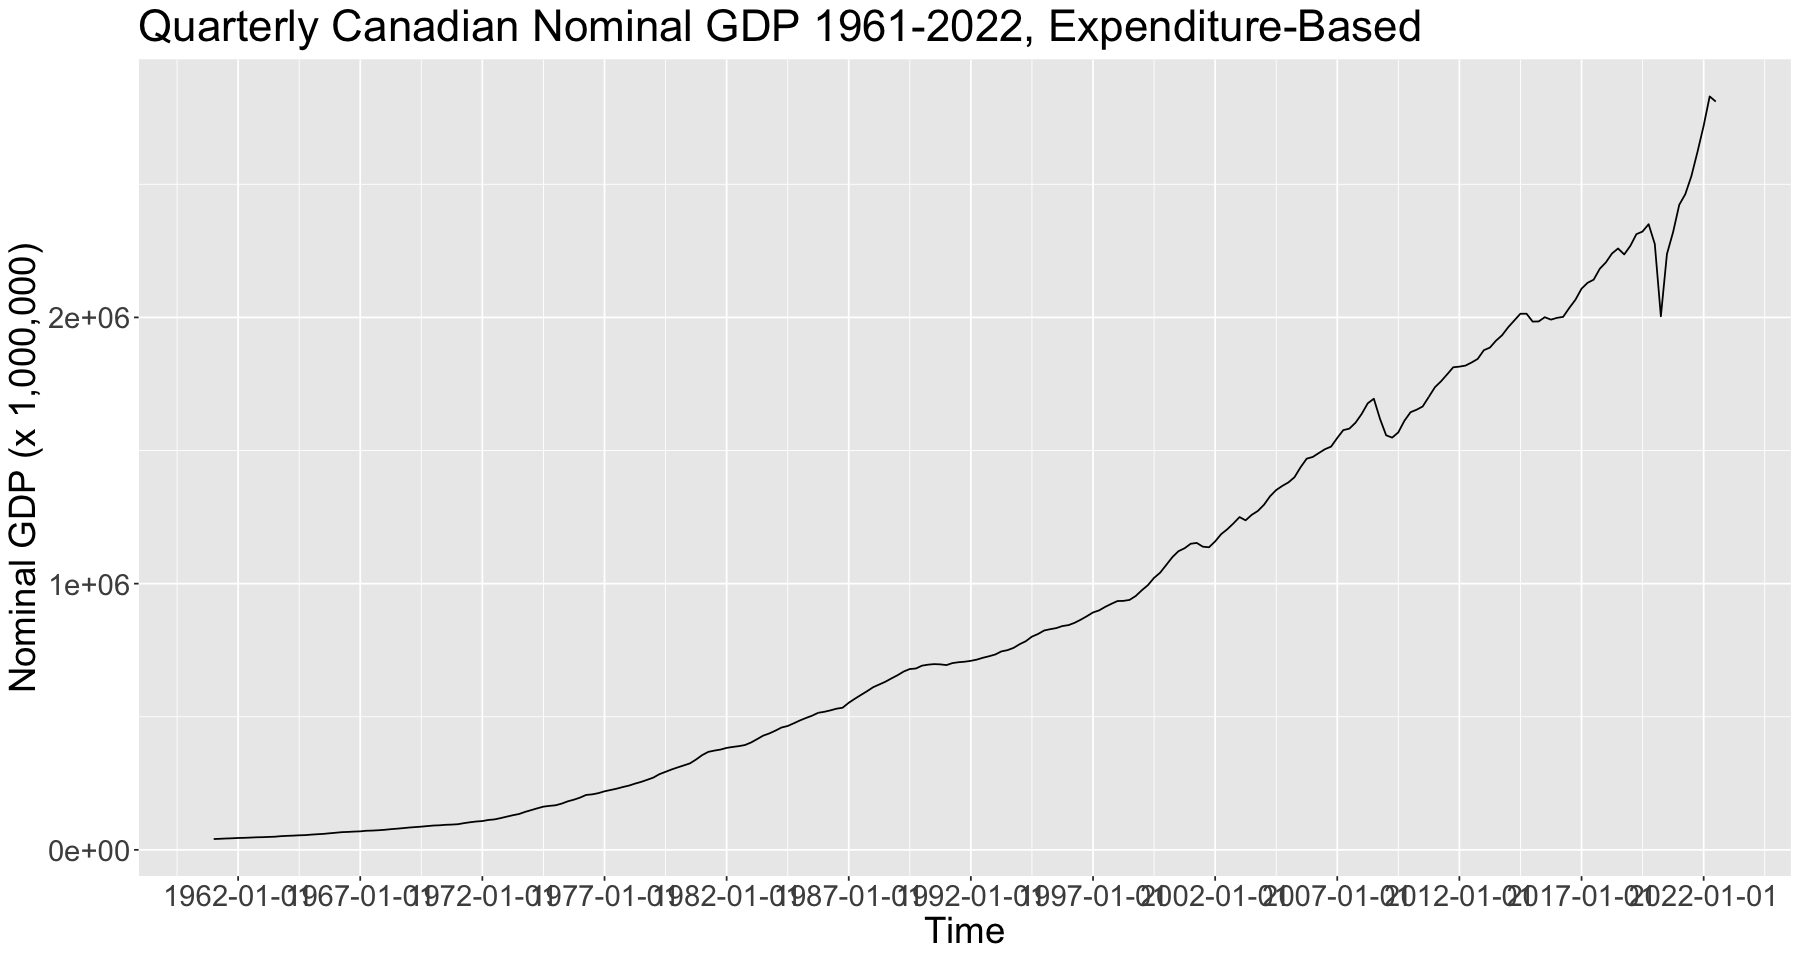

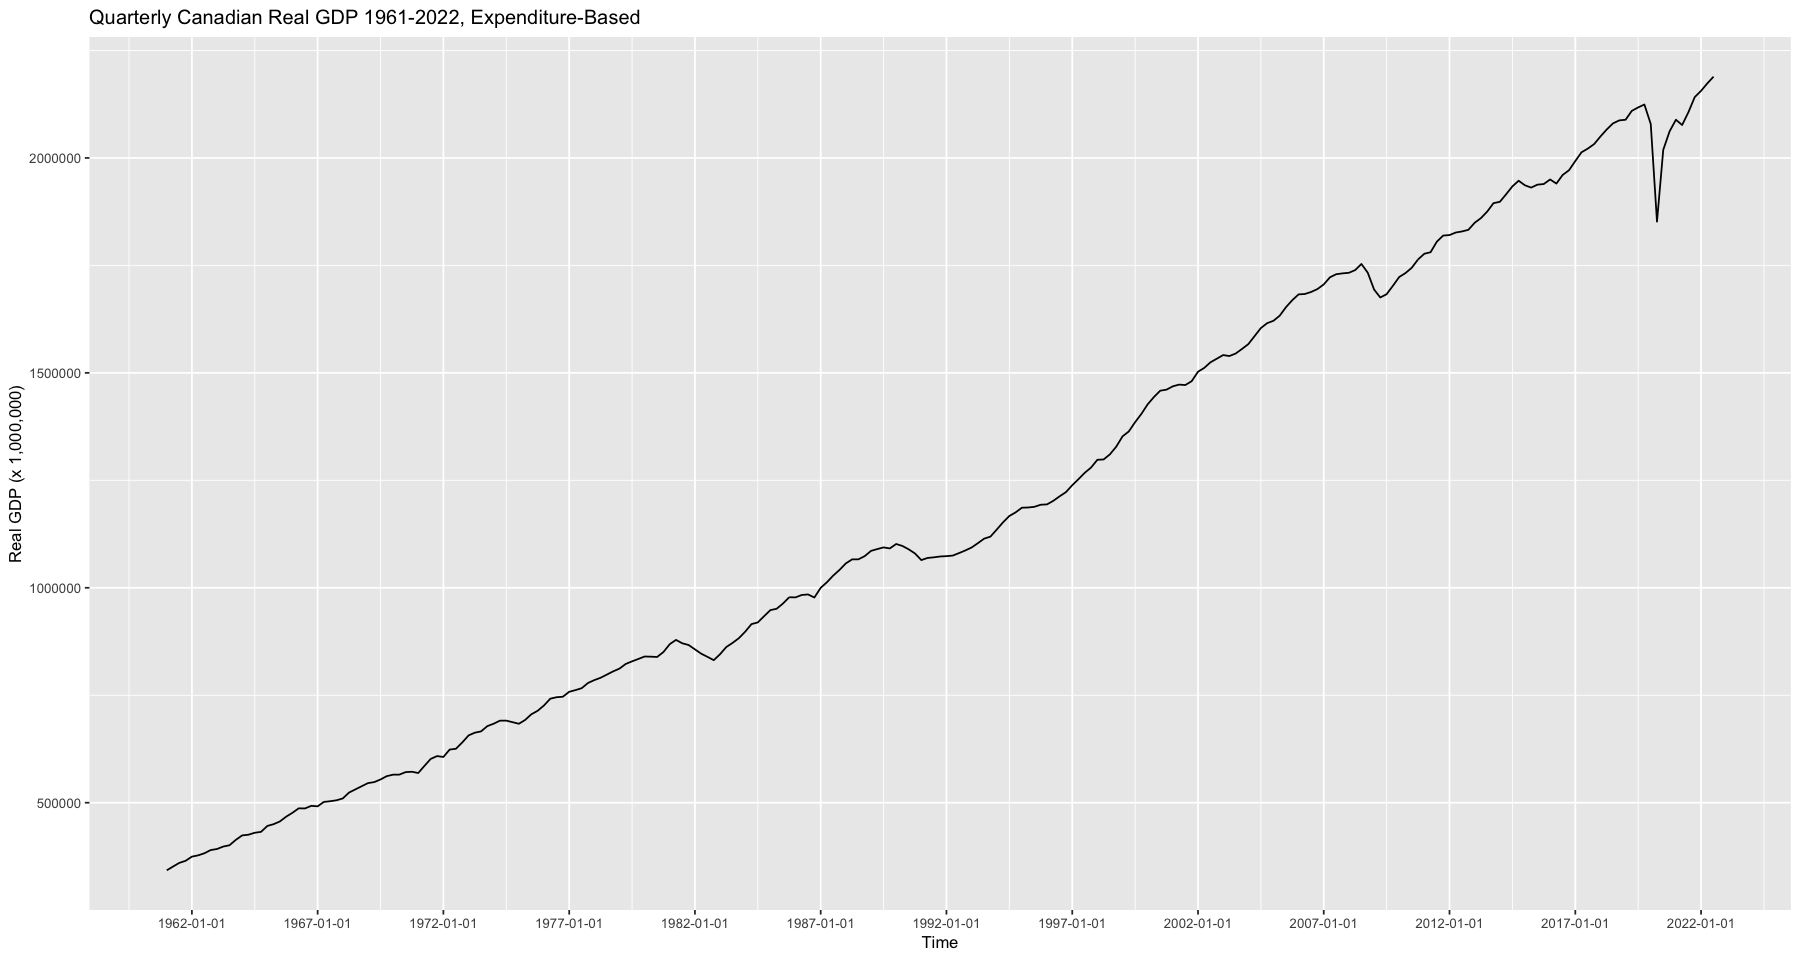

In [38]:
options(repr.plot.width=15, repr.plot.height=8)
nominal_gdp <- gdp_exp%>%
  filter(Prices == "Current prices",
         Estimates == "Gross domestic product at market prices",
         Seasonal.adjustment == "Seasonally adjusted at annual rates")%>%
  select(REF_DATE,VALUE)%>%
  ggplot(aes(x = REF_DATE, y = VALUE))+
  geom_line()+
  labs(title = "Quarterly Canadian Nominal GDP 1961-2022, Expenditure-Based",
       x = "Time",
       y = "Nominal GDP (x 1,000,000)")+
 scale_x_date(date_breaks = "5 year")+
theme(text = element_text(size = 22))

real_gdp <- gdp_exp%>%
  filter(Prices == "Chained (2012) dollars",
         Estimates == "Gross domestic product at market prices",
         Seasonal.adjustment == "Seasonally adjusted at annual rates")%>%
  select(REF_DATE,VALUE)%>%
  ggplot(aes(x = REF_DATE, y = VALUE))+
  geom_line()+
  labs(title = "Quarterly Canadian Real GDP 1961-2022, Expenditure-Based",
       x = "Time",
       y = "Real GDP (x 1,000,000)")+
 scale_x_date(date_breaks = "5 year")+
theme(text = element_text(size = 10))
nominal_gdp
real_gdp

The seasonally adjusted data both for real and nominal values are plotted as above. And according to these 2 graphs, both real GDP and nominal GDP in Canada have been increasing in general from 1961 to 2022. However, there are 3 notable recession period of time around the year 1980， 1992, 2008 and 2020 in terms of both nominal GDP and real GDP. Such periods corresponds to the Energy Crises, Gulf War, the Great Recession and the outbreak of the COVID-19 pandemic respectively which hit the economy a lot. I think the second plot is more informative, especially for the period around 1980, the reaction of real GDP is more sensitive to the crisis whereas the nominal GDP is not. Since it reflects the variation of real GDP within 60 years so that it compensates the inflation. In this case, the values plotted are more reliable in elaborating the change in domestic purchasing power.

### 2 
- Specify the real GDP in the sectors of consumption, investment, and government spending  **constant dollars of a particular year** **comparable** across time. 
- StatCan does not separate these three items in the same way as the majority of the academic does.

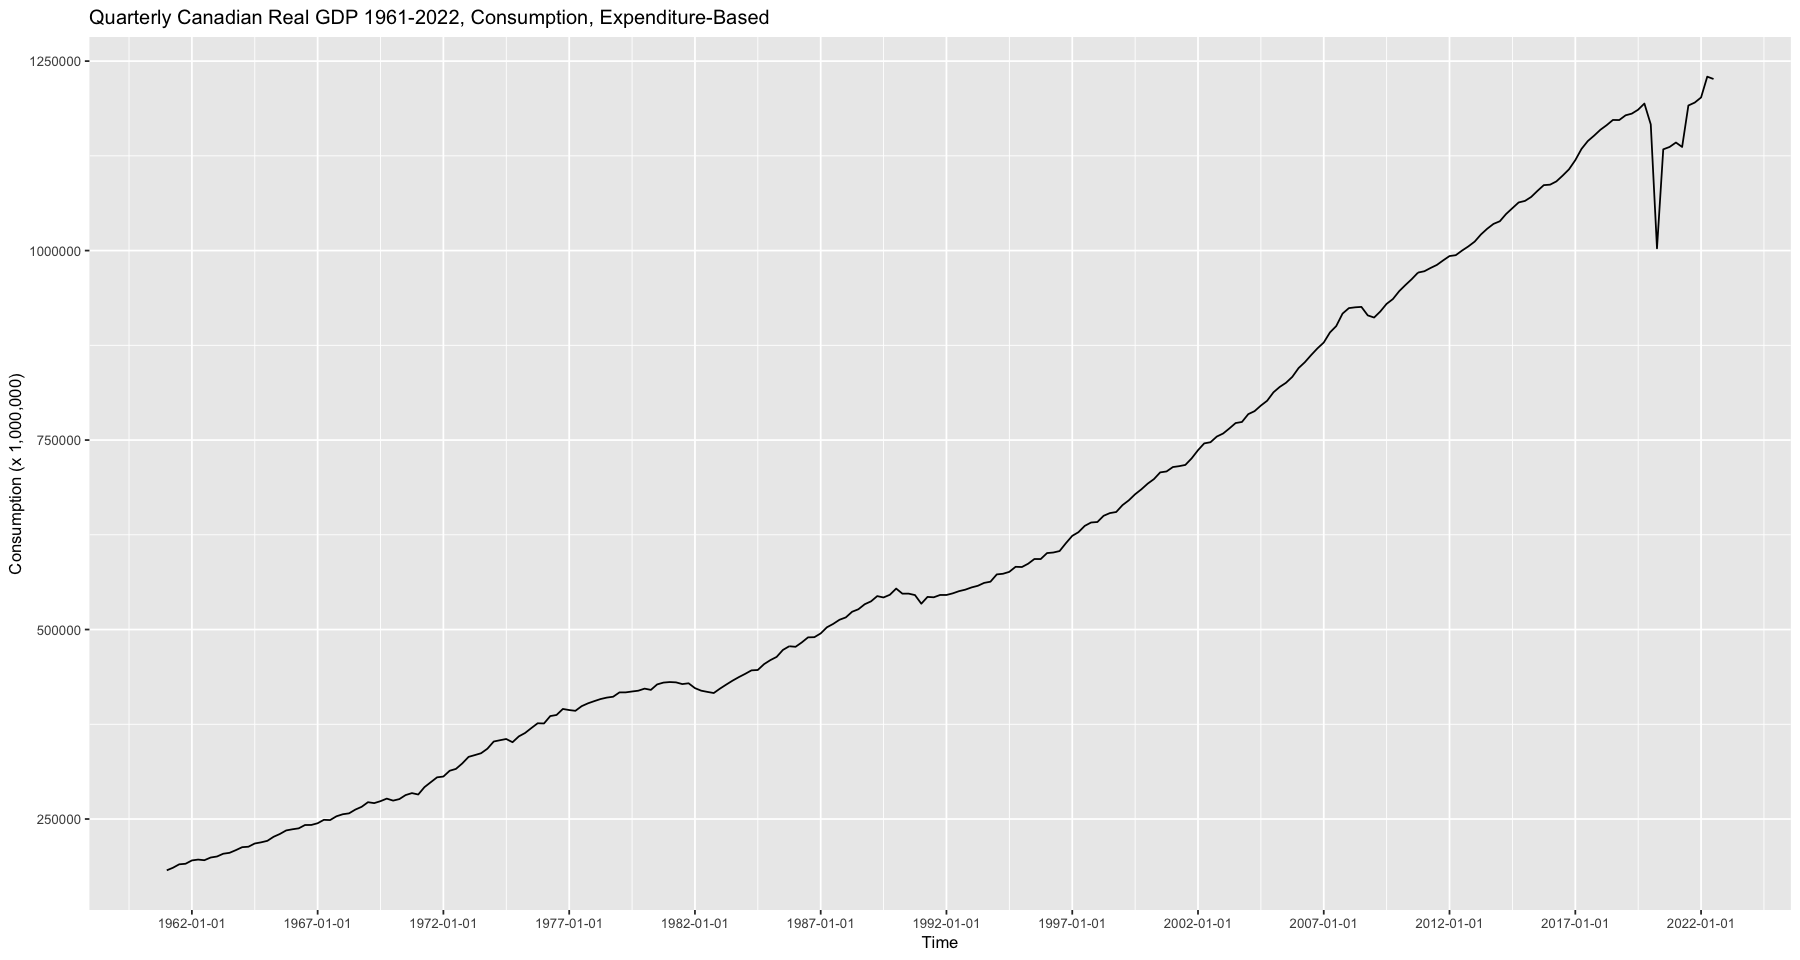

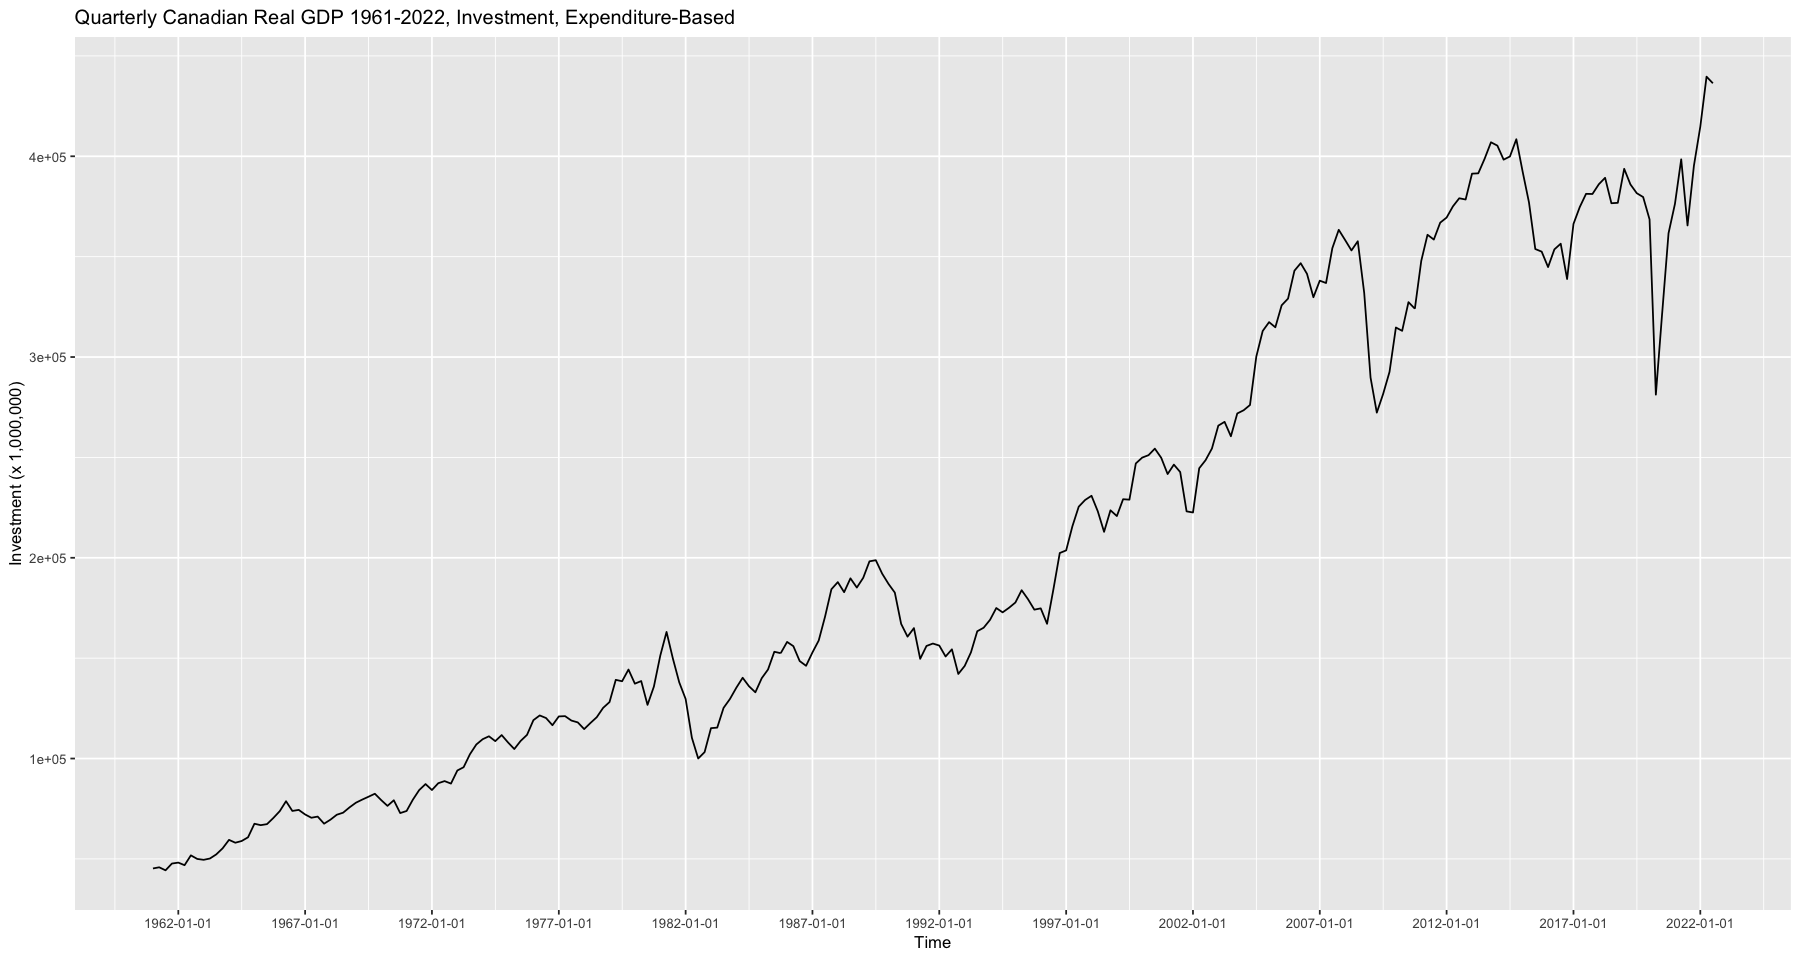

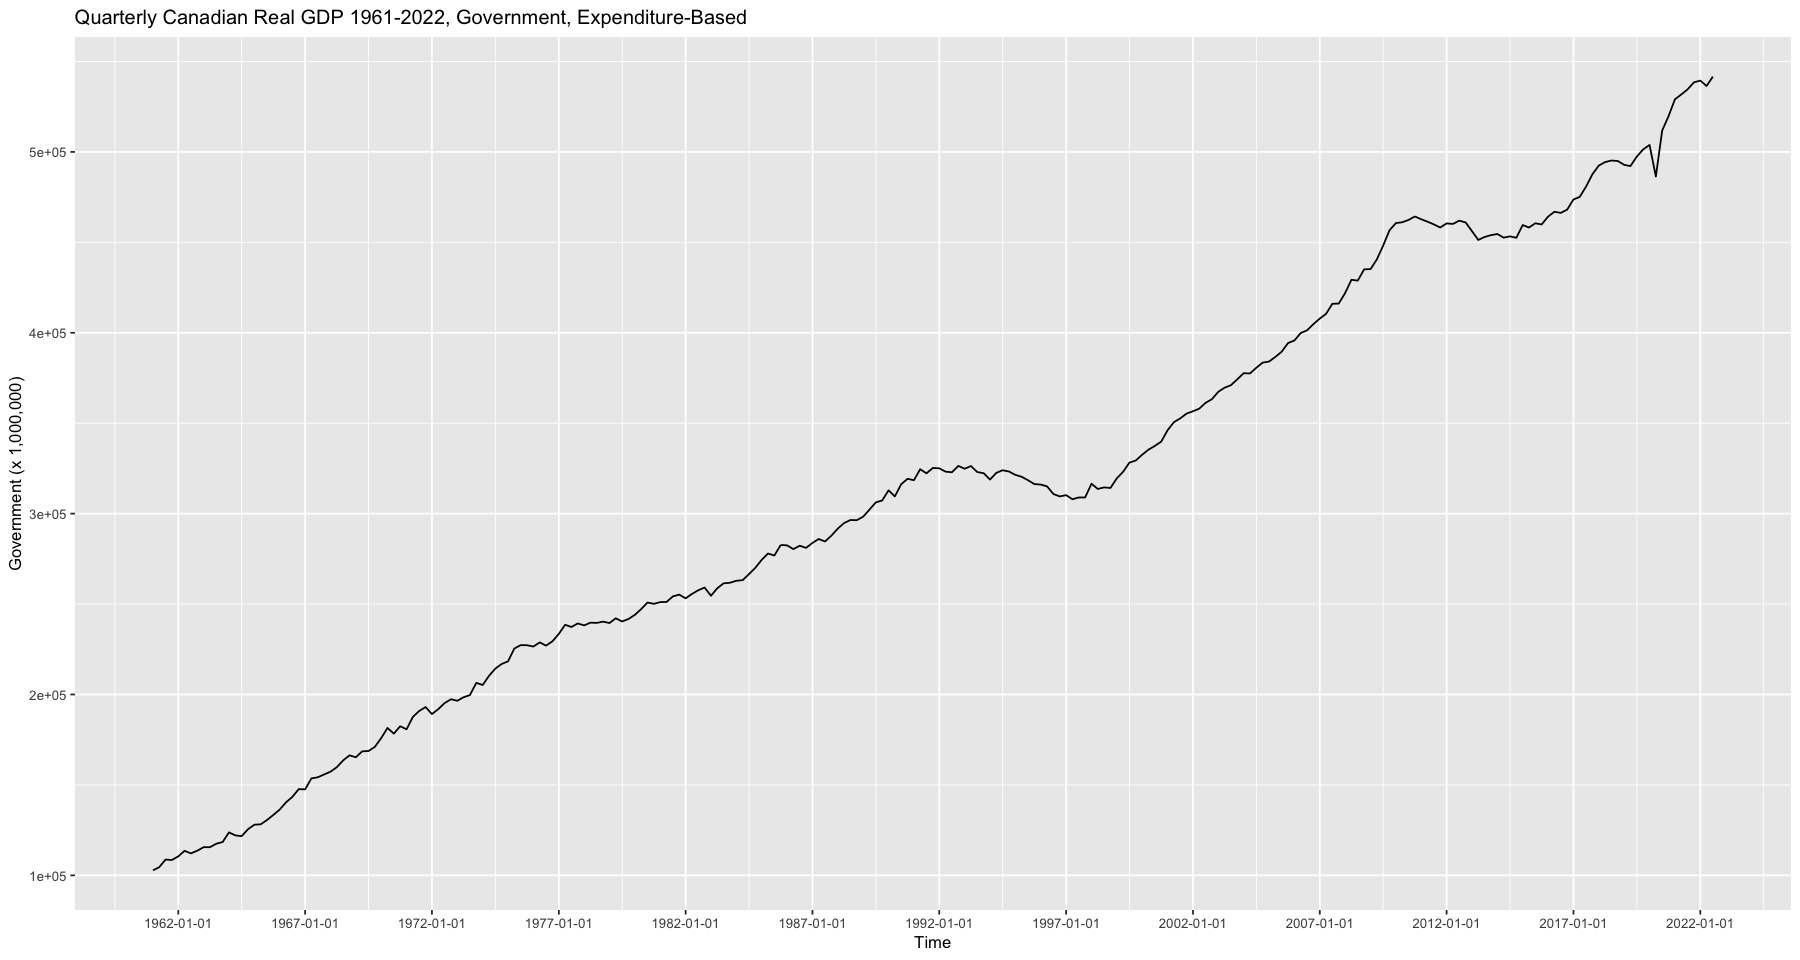

In [39]:
C <- gdp_exp%>%
  filter(Prices == "Chained (2012) dollars",
         Seasonal.adjustment == "Seasonally adjusted at annual rates",
          Estimates %in% c("Household final consumption expenditure"))%>%
                           #"Non-profit institutions serving households' final consumption expenditure"))%>%
group_by(REF_DATE)%>%
summarize(C = sum(VALUE))%>%      
 ggplot(aes(x = REF_DATE, y = C))+
  geom_line()+
  labs(title = "Quarterly Canadian Real GDP 1961-2022, Consumption, Expenditure-Based",
       x = "Time",
       y = "Consumption (x 1,000,000)")+
 scale_x_date(date_breaks = "5 year")+
theme(text = element_text(size = 10))


I <- gdp_exp%>%
  filter(Prices == "Chained (2012) dollars",
         Seasonal.adjustment == "Seasonally adjusted at annual rates",
          Estimates %in% c("Business gross fixed capital formation",
                          #"Non-profit institutions serving households' gross fixed capital formation",
                          "Investment in inventories"))%>%
group_by(REF_DATE)%>%
summarize(I = sum(VALUE))%>%    
 ggplot(aes(x = REF_DATE, y = I))+
  geom_line()+
  labs(title = "Quarterly Canadian Real GDP 1961-2022, Investment, Expenditure-Based",
       x = "Time",
       y = "Investment (x 1,000,000)")+
 scale_x_date(date_breaks = "5 year")+
theme(text = element_text(size = 10))

G <- gdp_exp%>%
  filter(Prices == "Chained (2012) dollars",
         Seasonal.adjustment == "Seasonally adjusted at annual rates",
          Estimates %in% c("General governments final consumption expenditure",
                          "General governments gross fixed capital formation"))%>%
group_by(REF_DATE)%>%
summarize(G = sum(VALUE))%>%    
 ggplot(aes(x = REF_DATE, y = G))+
  geom_line()+
  labs(title = "Quarterly Canadian Real GDP 1961-2022, Government, Expenditure-Based",
       x = "Time",
       y = "Government (x 1,000,000)")+
 scale_x_date(date_breaks = "5 year")+
theme(text = element_text(size = 10))

C
I
G

The fluctuation in the investment sector is the largest. In general, the Consumption is the largest part among these 3 sectors. There is a notable drop down in all these 3 sectors around 1992 and 2020.

### 3 
- Use the data for compensation of employees and find the fraction of ”Wages and salaries” change over time. Anything peculiar? 
- Provide a figure for the fraction only.

In [40]:
gdp_inc <- statcan_data("36-10-0103-01","eng")
colnames(gdp_inc) <- make.names(colnames(gdp_inc), unique = TRUE)
gdp_inc$Estimates <- as.factor(gdp_inc$Estimates)
gdp_inc$Seasonal.adjustment <- as.factor(gdp_inc$Seasonal.adjustment)
#summary(gdp_inc)

statcanR: downloading remote table.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 46 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): Cube Title, Product Id, CANSIM Id, URL, Cube Notes, Archive Status...
date (1): End Reference Period

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


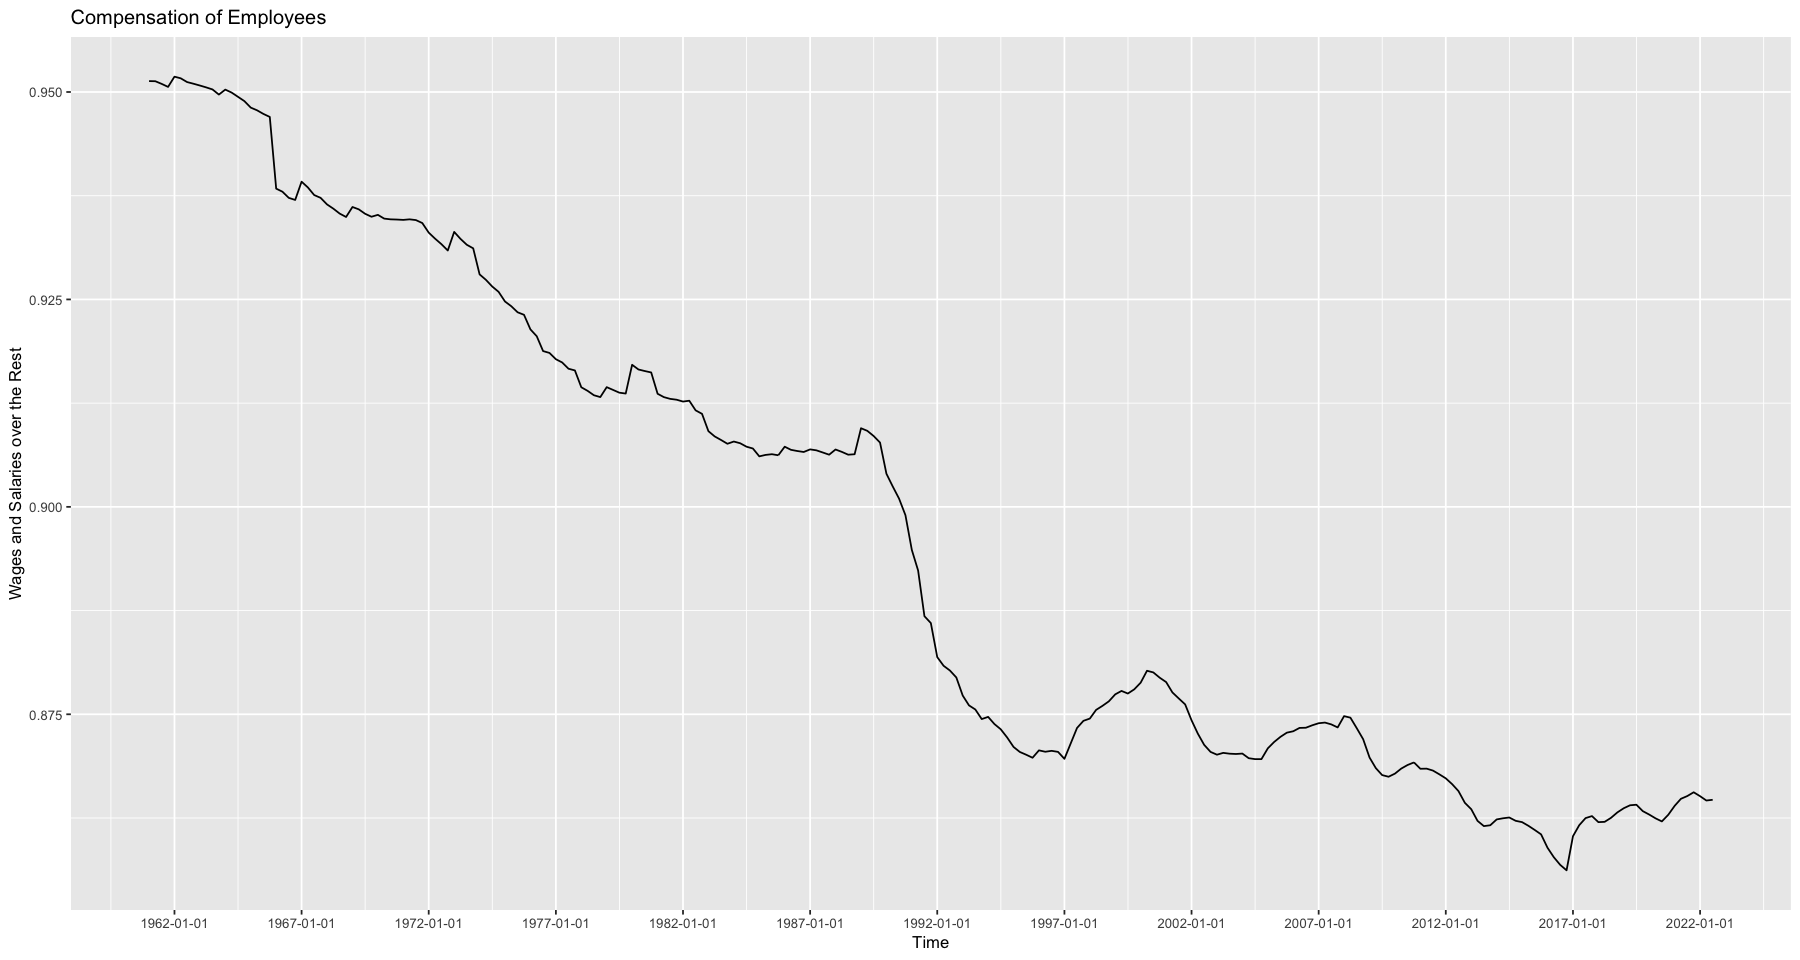

In [41]:
tidy3_1 <- gdp_inc%>%
filter(Estimates %in% c("Wages and salaries","Compensation of employees"),
      Seasonal.adjustment == "Seasonally adjusted at annual rates")%>%
select(REF_DATE, Estimates, VALUE)%>%
pivot_wider(names_from = Estimates,
           values_from = VALUE)
colnames(tidy3_1) <- make.names(colnames(tidy3_1), unique = TRUE)

tidy3_1%>%mutate(fraction_of_Wages_salaries = Wages.and.salaries / Compensation.of.employees)%>%
ggplot(aes(x = REF_DATE, y = fraction_of_Wages_salaries))+
geom_line()+
theme(text = element_text(size = 10))+
labs(title = "Compensation of Employees",
    x = "Time",
    y = "Wages and Salaries over the Rest")+
scale_x_date(date_breaks = "5 year")

The fraction over time has been plotted as above, and it keeps decreasing in general. One of the peculiar things can be, before 1992 the value of the fraction dropped dramatically compared to the year later when it keeps dropping at a small rate steadily.

### 4. 
- Get data for real GDP by industry for 1997-2022. Restrict attention to **industries that have available data for all years**. 
- Find the industries that grew disproportionately (more than a standard deviation above the mean) with respect to aggregate output during the period and the industries grew less than proportionately (less than a standard deviation below the mean).
- Present a table of growth rates for three industries with the smallest and largest growth rate.

In [42]:
gdp_by_ind <- statcan_data("36-10-0449-01","eng")
colnames(gdp_by_ind) <- make.names(colnames(gdp_by_ind), unique = TRUE)
gdp_by_ind$North.American.Industry.Classification.System..NAICS. <- as.factor(gdp_by_ind$North.American.Industry.Classification.System..NAICS.)
gdp_by_ind$Seasonal.adjustment <- as.factor(gdp_by_ind$Seasonal.adjustment)
gdp_by_ind$Prices <- as.factor(gdp_by_ind$Prices)
#summary(gdp_by_ind)
n4 <- 103 #number of quarters within 1997Q1-2022Q3

statcanR: downloading remote table.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 327 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): Cube Title, Product Id, CANSIM Id, URL, Cube Notes, Archive Status...
date (1): End Reference Period

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [43]:
tidy4 <- gdp_by_ind%>%
filter(Prices == "Chained (2012) dollars",
Seasonal.adjustment == "Seasonally adjusted at annual rates")%>%
select(REF_DATE, North.American.Industry.Classification.System..NAICS., VALUE)%>%
filter(!is.na(VALUE))

In [44]:
all_valid_ind <- tidy4 %>%group_by(North.American.Industry.Classification.System..NAICS.)%>%
summarize(n = n())%>%
filter(n == n4, !grepl("All industries", North.American.Industry.Classification.System..NAICS.)) %>%
pull(North.American.Industry.Classification.System..NAICS.)
length(all_valid_ind)#=186

[1] 186

In [45]:
n4root<-function(x)
{
   sign(x)*abs(x)^(1/(n4-1))
}

gr_base <- tidy4%>%
filter(North.American.Industry.Classification.System..NAICS. %in% all_valid_ind,
      REF_DATE == "1997-01-01" | REF_DATE == "2022-07-01")%>%
pivot_wider(names_from= REF_DATE, values_from = VALUE, names_repair = "universal")%>%
mutate(growth_rate = n4root(..2022.07.01 / ..1997.01.01) -1)%>%
group_by(North.American.Industry.Classification.System..NAICS., 
         ..1997.01.01,
        ..2022.07.01,
        growth_rate)%>%
arrange(desc(growth_rate))

gr_base <- gr_base%>%
filter(!grepl(0, ..1997.01.01))
#Cannabis stores (licensed) [453BL] need to be dropped since the value in base year is 0 and the growth rate cannot be calculated

sum_gr <- data.frame(avg_growth_rate = rep(mean(pull(gr_base[4])),nrow(gr_base)),
                     sd_growth_rate = rep(sd(pull(gr_base[4])),nrow(gr_base)),
                    upper = rep(mean(pull(gr_base[4]))+sd(pull(gr_base[4])),nrow(gr_base)),
                    lower = rep(mean(pull(gr_base[4]))-sd(pull(gr_base[4])),nrow(gr_base)))

new_gr <- cbind(gr_base, sum_gr)%>%
mutate(concl = ifelse(growth_rate>upper, "grew disproportionately", ifelse(growth_rate<lower, "grew less than proportionately", "")))

industries_grew_disproportionately <- new_gr%>%
filter(concl == "grew disproportionately")%>%
ungroup(growth_rate)%>%
select(North.American.Industry.Classification.System..NAICS.,growth_rate)

industries_grew_less_disproportionately <- new_gr%>%
filter(concl == "grew less than proportionately")%>%
ungroup(growth_rate)%>%
select(North.American.Industry.Classification.System..NAICS.,growth_rate)

thr_ind_small_gr <-new_gr%>%arrange(growth_rate)%>%head(3)%>%select(North.American.Industry.Classification.System..NAICS., growth_rate)

thr_ind_lrg_gr <-new_gr%>%arrange(growth_rate)%>%tail(3)%>%select(North.American.Industry.Classification.System..NAICS., growth_rate)


industries_grew_disproportionately
industries_grew_less_disproportionately
thr_ind_small_gr
thr_ind_lrg_gr

New names:
• `1997-01-01` -> `..1997.01.01`
• `2022-07-01` -> `..2022.07.01`
New names:
• `..1997.01.01` -> `...2`
• `..2022.07.01` -> `...3`


North.American.Industry.Classification.System..NAICS.,growth_rate
<fct>,<dbl>
Computer systems design and related services [5415],0.019969749
Cannabis production [111C],0.018666975
Cannabis sector [T021],0.016719267
"Financial investment services, funds and other financial vehicles [52A]",0.013805887
Warehousing and storage [493],0.011407559
Non-depository credit intermediation and activities related to credit intermediation [522A],0.011407268
"Ventilation, heating, air-conditioning and commercial refrigeration equipment manufacturing [3334]",0.010699554
Other food manufacturing [3119],0.010189148
Crop production [111],0.009477414


North.American.Industry.Classification.System..NAICS.,growth_rate
<fct>,<dbl>
Computer and electronic product manufacturing [334],-0.001556870
Breweries [31212],-0.001583277
Converted paper product manufacturing [3222],-0.001893607
Radio and television broadcasting [5151],-0.001900030
"Fishing, hunting and trapping [114]",-0.002079871
"Soap, cleaning compound and toilet preparation manufacturing [3256]",-0.002233575
Coal mining [2121],-0.003432430
Printing and related support activities [323],-0.003951819
Paper manufacturing [322],-0.004103265


North.American.Industry.Classification.System..NAICS.,growth_rate
<fct>,<dbl>
Household appliance manufacturing [3352],-0.01391966
Tobacco manufacturing [3122],-0.01153702
Textile and textile product mills [31A],-0.00721363


North.American.Industry.Classification.System..NAICS.,growth_rate
<fct>,<dbl>
Cannabis sector [T021],0.01671927
Cannabis production [111C],0.01866697
Computer systems design and related services [5415],0.01996975
